In [ ]:
#!pip install --upgrade pip --user
#!pip install tensorflow --user

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [ ]:
from tensorflow.keras import datasets, layers, models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
import sys
os.chdir('/content/gdrive/My Drive/AI ML ')
!pwd
Root_DIR = os.path.abspath("")
print(Root_DIR)
sys.path.append(Root_DIR)

/content/gdrive/.shortcut-targets-by-id/1SubdptR2K_xSjz4kDT6vPp2JHEdOeOTD/AI ML 
/content/gdrive/.shortcut-targets-by-id/1SubdptR2K_xSjz4kDT6vPp2JHEdOeOTD/AI ML 


#**Dataset**

In [ ]:
DATADIR = '/content/gdrive/My Drive/AI ML '
xfile = os.path.join(DATADIR, 'X.pickle')
yfile = os.path.join(DATADIR, 'y.pickle')

In [ ]:
import pickle

pickle_in = open(xfile,"rb")
X = pickle.load(pickle_in)

pickle_in = open(yfile,"rb")
y = pickle.load(pickle_in)

In [ ]:
y = np.array(y)
#print(X,"\n\n",y)

#**Data Splitting**

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3)
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.2, random_state=10)


print("Train features shape: ", X_train.shape )
print("Train target shape: ", y_train.shape )
print("Train features shape: ", X_test.shape )
print("Train target shape: ", y_test.shape )
print("Validation features shape: ", X_val.shape )
print("Validation target shape: ", y_val.shape )

Train features shape:  (1121, 150, 150, 1)
Train target shape:  (1121,)
Train features shape:  (601, 150, 150, 1)
Train target shape:  (601,)
Validation features shape:  (281, 150, 150, 1)
Validation target shape:  (281,)


In [ ]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

#**8 Classes for Emoji detection**

In [ ]:
classes = ["ANGRY", "HEARTEYES", "LAUGH", "NEUTRAL", "SAD", "SMILING", "TEASING", "WINK"]

#**CNN Model**

In [ ]:
cnn = Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150, 150, 1)), #250,250 = shape of image... 1 channel
    layers.MaxPooling2D((2, 2)),
    #layers.Dropout(0.5),
    
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #layers.Dropout(0.25),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #layers.Dropout(0.25),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    #layers.Dropout(0.25),
    
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(8, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 148, 148, 32)      320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 72, 72, 128)       36992     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 34, 34, 64)        73792     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 64)      

#**Fitting the model**

In [ ]:
cnnModel = cnn.fit(X_train, y_train, batch_size=256, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
5/5 [==============================] - 53s 10s/step - loss: 31.3041 - accuracy: 0.1213 - val_loss: 6.4479 - val_accuracy: 0.1530
Epoch 2/50
5/5 [==============================] - 52s 10s/step - loss: 3.1850 - accuracy: 0.1365 - val_loss: 2.1388 - val_accuracy: 0.0961
Epoch 3/50
5/5 [==============================] - 52s 10s/step - loss: 2.2090 - accuracy: 0.1302 - val_loss: 5.3634 - val_accuracy: 0.0641
Epoch 4/50
5/5 [==============================] - 52s 10s/step - loss: 2.8804 - accuracy: 0.1490 - val_loss: 2.0833 - val_accuracy: 0.0961
Epoch 5/50
5/5 [==============================] - 52s 10s/step - loss: 2.0656 - accuracy: 0.1677 - val_loss: 2.0552 - val_accuracy: 0.1922
Epoch 6/50
5/5 [==============================] - 52s 10s/step - loss: 2.0209 - accuracy: 0.2034 - val_loss: 2.0486 - val_accuracy: 0.1922
Epoch 7/50
5/5 [==============================] - 52s 10s/step - loss: 2.0426 - accuracy: 0.1971 - val_loss: 2.1176 - val_accuracy: 0.1139
Epoch 8/50
5/5 [==========

#**Model accuracy**

In [ ]:
cnn.evaluate(X_test,y_test)

19/19 [==============================] - 9s 484ms/step - loss: 1.3842 - accuracy: 0.6356


[1.3842215538024902, 0.6356073021888733]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.0656477e-10, 6.1534228e-12, 4.1088387e-07, 9.8883039e-01,
        1.1151721e-02, 1.7494938e-05, 3.1584285e-10, 4.2068918e-14],
       [9.4597041e-10, 1.3067565e-19, 3.1749096e-05, 8.4795976e-01,
        1.5200847e-01, 9.9576626e-15, 2.2175282e-11, 1.4932197e-23],
       [4.4015748e-03, 5.3891081e-01, 1.4034022e-02, 3.6272630e-02,
        2.2934390e-02, 3.7225649e-01, 2.9548847e-03, 8.2351891e-03],
       [8.8444119e-07, 4.5995195e-12, 3.2750126e-12, 8.4454809e-15,
        2.9261915e-13, 2.0950240e-07, 8.7567838e-16, 9.9999893e-01],
       [1.7624872e-02, 2.7617104e-03, 8.9546436e-01, 4.4174496e-02,
        2.0996340e-02, 1.6217075e-02, 2.0421890e-03, 7.1901031e-04]],
      dtype=float32)

#**Evaluation**

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
print(" Predicted Classes: ",y_classes[:5])

 Predicted Classes:  [3, 3, 1, 7, 2]


In [ ]:
print("Actual Classes: ",y_test[:5])

Actual Classes:  [3 3 1 7 2]


In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(8)]
print(classification_report(y_test, y_classes, target_names=classes))

correct = np.nonzero(y_classes==y_test)[0]
incorrect = np.nonzero(y_classes!=y_test)[0]

              precision    recall  f1-score   support

       ANGRY       0.64      0.71      0.67        59
   HEARTEYES       0.93      0.62      0.74        65
       LAUGH       0.70      0.63      0.66        89
     NEUTRAL       0.66      0.64      0.65        92
         SAD       0.52      0.69      0.59        71
     SMILING       0.47      0.63      0.54        73
     TEASING       0.77      0.53      0.63        62
        WINK       0.66      0.63      0.65        90

    accuracy                           0.64       601
   macro avg       0.67      0.64      0.64       601
weighted avg       0.66      0.64      0.64       601



In [ ]:
conf_matrix = confusion_matrix(y_test, y_classes)
accClass = conf_matrix.diagonal()/conf_matrix.sum(axis=1)

classACC = []
for i in range(8):
  temp = []
  temp.append(classes[i])
  temp.append(round(accClass[i],2))
  classACC.append(temp)

from tabulate import tabulate
print(tabulate(classACC, headers=['Class', 'Accuracy']))


Class        Accuracy
---------  ----------
ANGRY            0.71
HEARTEYES        0.62
LAUGH            0.63
NEUTRAL          0.64
SAD              0.69
SMILING          0.63
TEASING          0.53
WINK             0.63


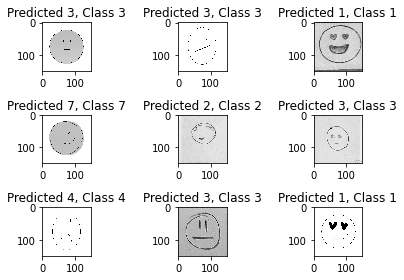

In [ ]:
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(150, 150), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_classes[correct], y_test[correct]))
    plt.tight_layout()

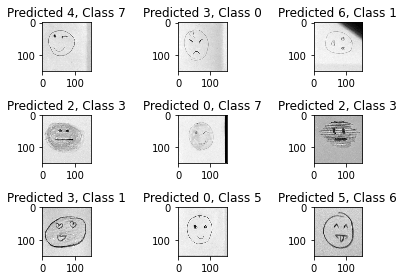

In [ ]:
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(150,150), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_classes[incorrect], y_test[incorrect]))
    plt.tight_layout()

#**Confusion Matrix**

In [ ]:
conf_matrix = confusion_matrix(y_test, y_classes)

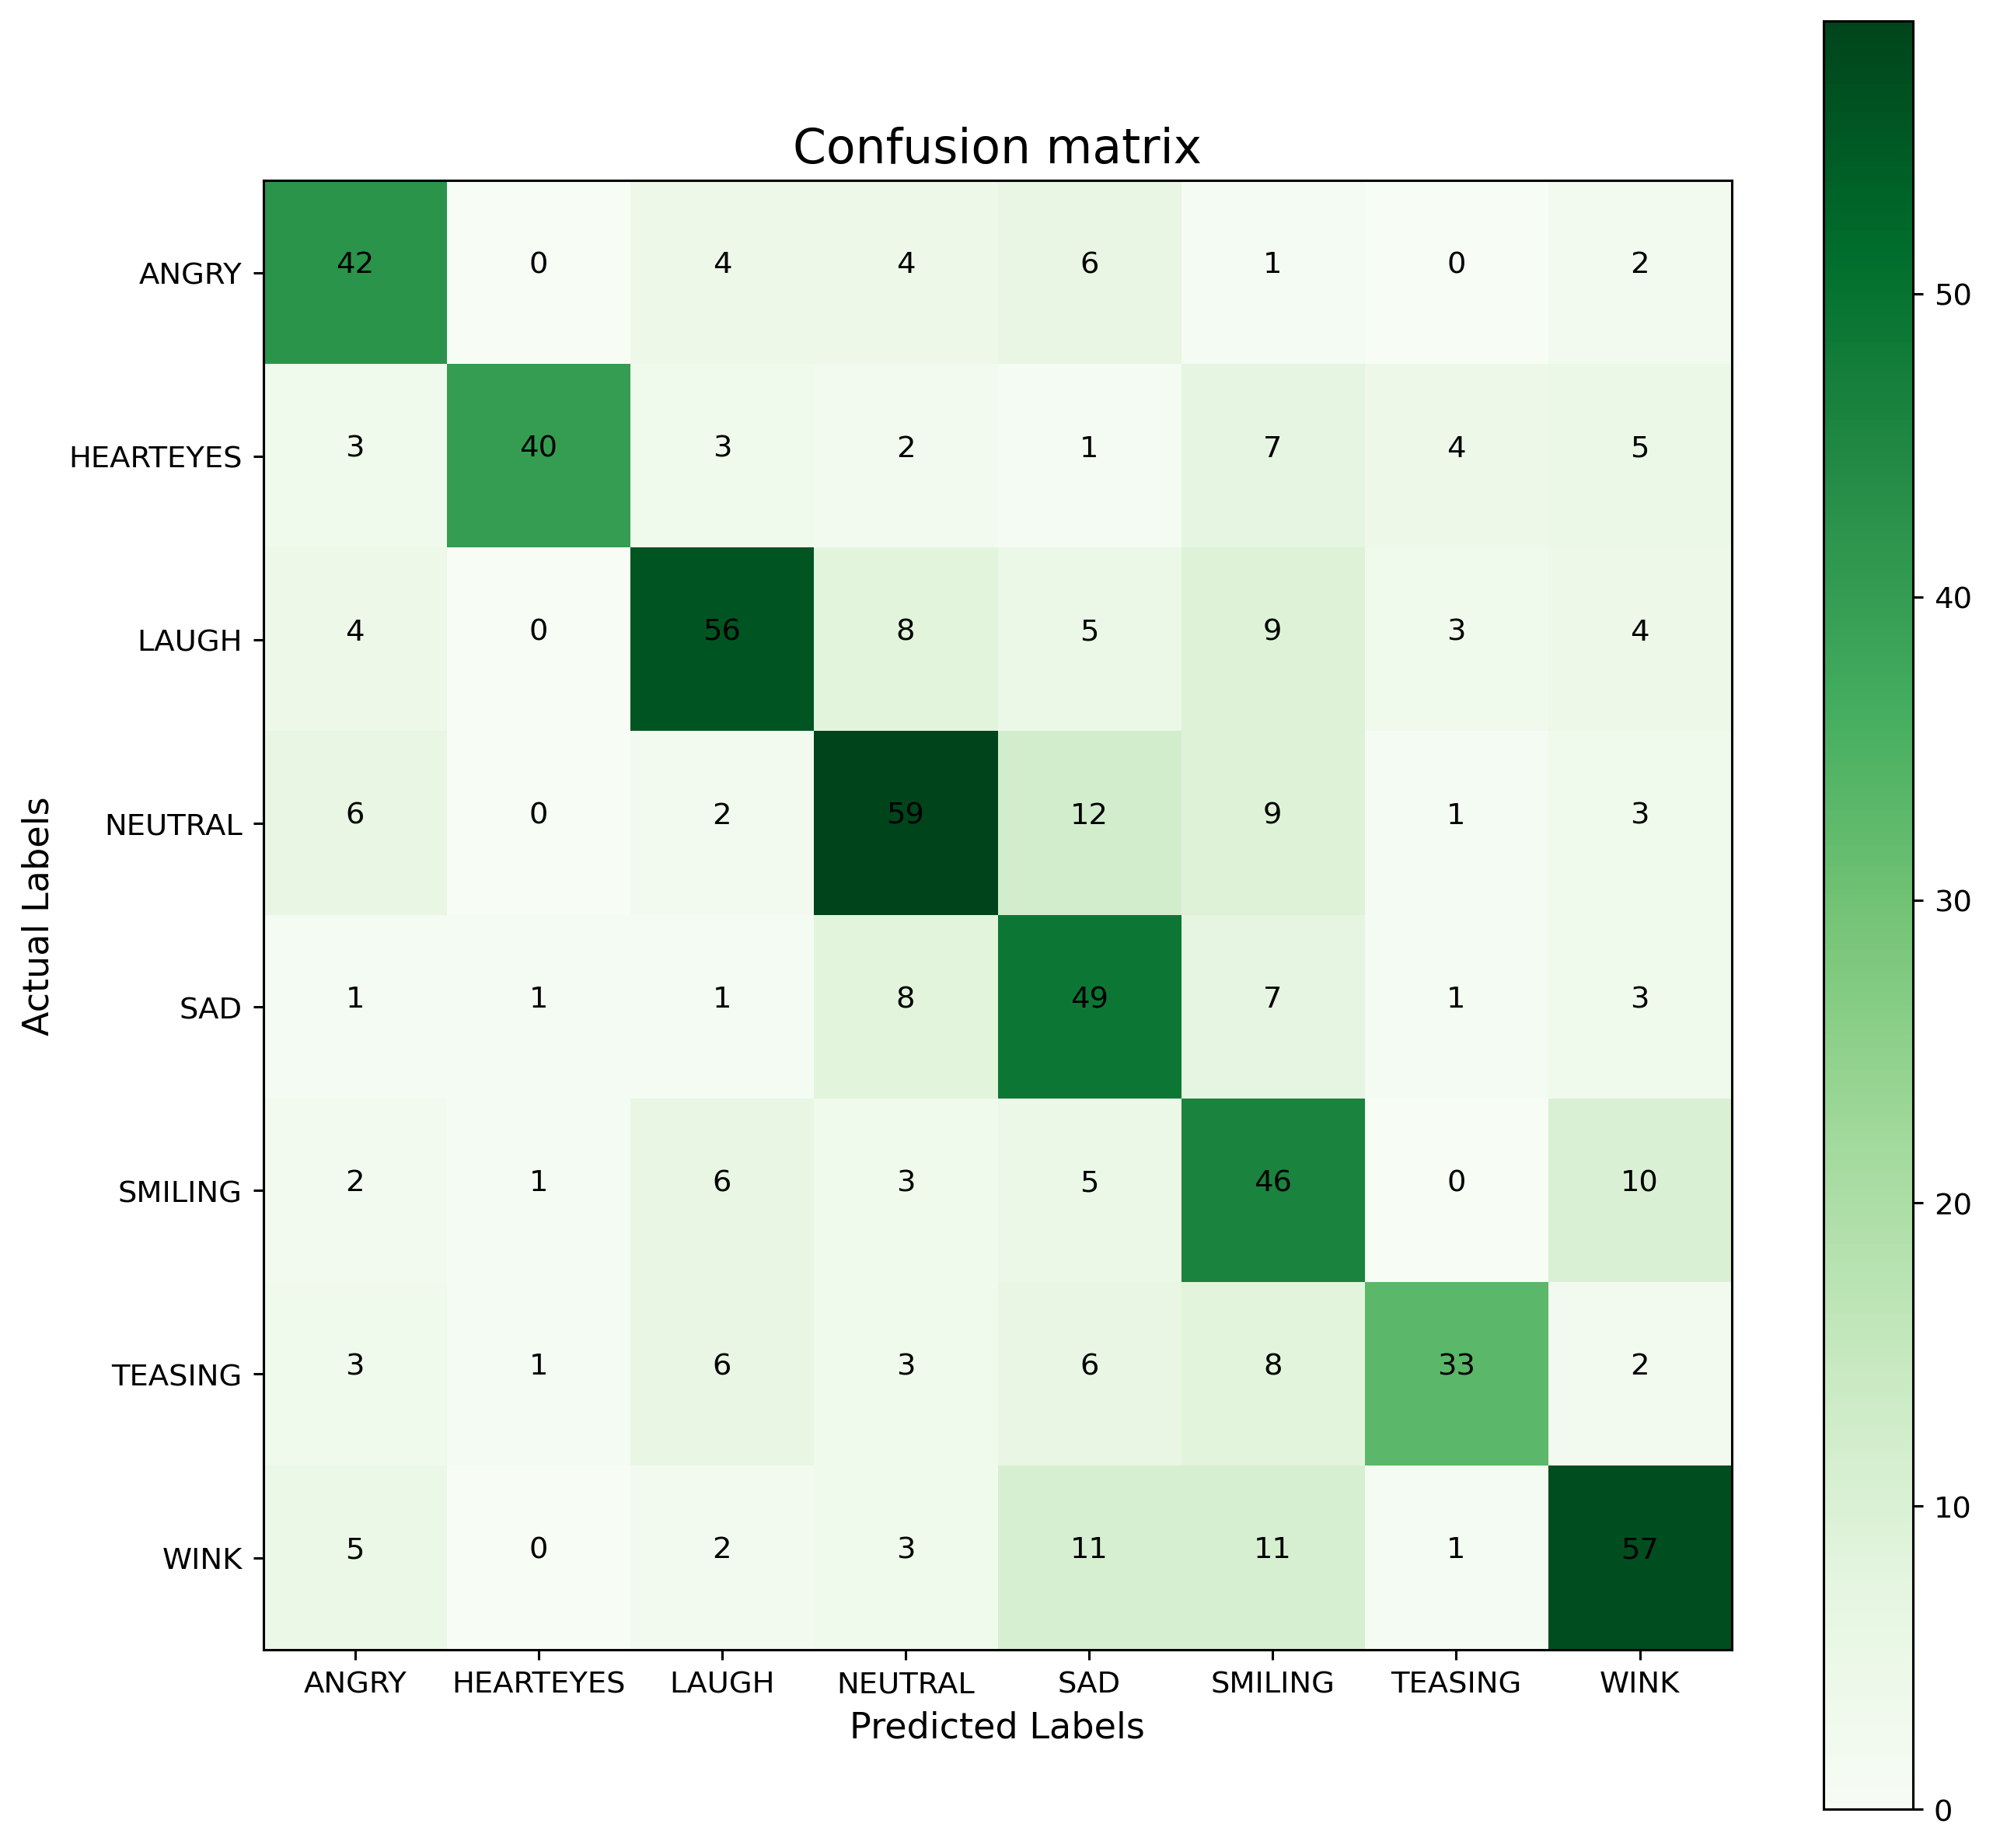

In [ ]:
plt.figure(figsize=(11,11), dpi=277)
plt.imshow(conf_matrix,cmap=plt.cm.Greens)
plt.title('Confusion matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(8)
plt.yticks(tick_marks, classes)
plt.xticks(tick_marks, classes)

plt.colorbar()

for i,j in itertools.product(range(conf_matrix.shape[0]),range(conf_matrix.shape[1])):
    plt.text(j,i,conf_matrix[i,j], horizontalalignment='center',
             color='white' if conf_matrix[i, j] > 450 else 'black')

plt.show()

#**Plotting Training and Validation accuracy**

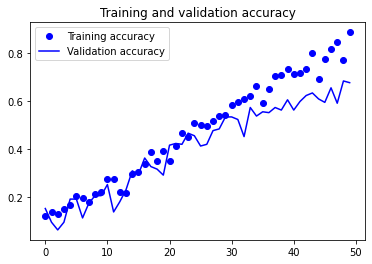

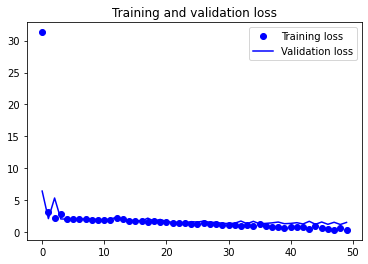

In [ ]:
accuracy = cnnModel.history['accuracy']
val_accuracy = cnnModel.history['val_accuracy']
loss = cnnModel.history['loss']
val_loss = cnnModel.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#**Implementation**

In [ ]:
import cv2
import imutils
def plt_imshow(title, image):
  #convert bgr img to rgb image
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  plt.title(title)
  plt.grid(False)
  plt.show()

In [ ]:
args = {"1": "heee.jpeg", "2":"smile.jpg"}

User image from drive:


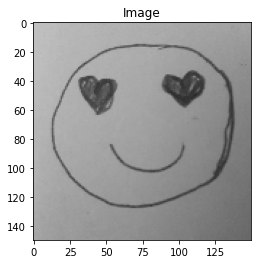

In [ ]:
image = cv2.imread(args["1"])

image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (150, 150))
print("User image from drive:")
plt_imshow('Image', image)

In [ ]:
X = np.array(image).reshape(-1, 150, 150, 1)
#print(X)

In [ ]:
torch.cuda.is_available()

True

In [ ]:
import torch

In [ ]:
y_predimg = cnn.predict(X)
actclass = 1
preclass= np.argmax(y_predimg)
print("Predicted class: ",preclass)

if preclass==actclass:
  print("This is a", classes[actclass],"emoji -> Success")
else:
  print("Model failed")

Predicted class:  1
This is a HEARTEYES emoji -> Success
